In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [27]:
# Fetch MNIST Dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


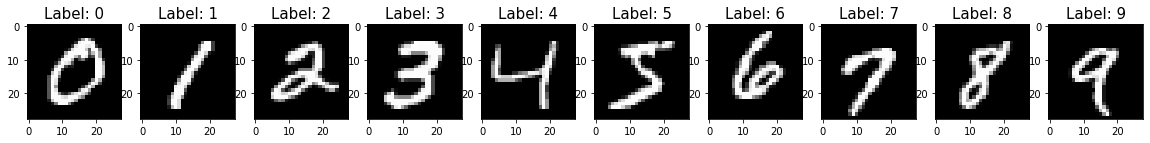

In [28]:
# Print Example Data
  # No need for "class balancing"

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range (num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Label: {}".format(i), fontsize = 15)



In [10]:
# Print Labels

for i in range (10):
  print(y_train[i], end = " ")

5 0 4 1 9 2 1 3 1 4 

In [29]:
# P: Each image labeled with an int value, potential that model may guess a non-discrete value ex: 4.5

# Create vector of length = num_classes for each item in y_train/test set
# Each vector contains a bin value for the presence / absecene of a value at index: i = val - 1

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [31]:
# Normalize dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape Data
  # Turn training data into a single vector dim(v) = 784
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


In [37]:
# Model

model = Sequential()

model.add(Dense(units=128, input_shape=(784, ), activation ='relu'))
model.add(Dense(units=128, activation ='relu'))
model.add(Dropout(.25)) # 25% of nuerons removed during training
model.add(Dense(units = 10, activation ='softmax')) # Assigns correctness probability for each class

# Categorical Crossentropy: Loss function for multiple classes
# Adam Optimizer: Standard


model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Training Params

batch_size = 1024
epochs = 100
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
59/59 [==============================] - 3s 47ms/step - loss: 0.3351 - accuracy: 0.9022
Epoch 2/100
59/59 [==============================] - 2s 26ms/step - loss: 0.3275 - accuracy: 0.9039
Epoch 3/100
59/59 [==============================] - 1s 20ms/step - loss: 0.3225 - accuracy: 0.9062
Epoch 4/100
59/59 [==============================] - 1s 20ms/step - loss: 0.3171 - accuracy: 0.9078
Epoch 5/100
59/59 [==============================] - 1s 20ms/step - loss: 0.3117 - accuracy: 0.9087
Epoch 6/100
59/59 [==============================] - 1s 19ms/step - loss: 0.3081 - accuracy: 0.9106
Epoch 7/100
59/59 [==============================] - 1s 21ms/step - loss: 0.2998 - accuracy: 0.9121
Epoch 8/100
59/59 [==============================] - 1s 21ms/step - loss: 0.2975 - accuracy: 0.9130
Epoch 9/100
59/59 [==============================] - 1s 20ms/step - loss: 0.2920 - accuracy: 0.9141
Epoch 10/100
59/59 [==============================] - 1s 21ms/step - loss: 0.2854 - accuracy: 0.9166

In [40]:
# Evaluation

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.9727
Test Loss: 0.09288263320922852, Test Accuracy: 0.9726999998092651


In [42]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)

print(y_pred)
print(y_pred_classes) # Retuns largest probable value's index from each row

313/313 [==============================] - 1s 3ms/step
[[3.6274994e-07 1.2865446e-08 7.3932635e-05 ... 9.9987364e-01
  4.2518130e-07 6.1136170e-06]
 [2.3865653e-06 7.0708263e-04 9.9869478e-01 ... 1.0292906e-08
  7.3242074e-07 3.8763562e-14]
 [1.4583383e-06 9.9606854e-01 7.8920642e-04 ... 7.0422923e-04
  1.7086858e-03 1.3915210e-05]
 ...
 [4.7724726e-09 5.7077418e-09 9.6377555e-09 ... 1.2659159e-04
  3.1750169e-05 3.1723760e-04]
 [6.3012344e-08 9.1483287e-08 5.0086530e-09 ... 1.2112944e-09
  2.5679142e-04 1.1420588e-07]
 [1.0625360e-05 1.8675279e-09 1.3526233e-05 ... 2.0784949e-10
  7.4480522e-07 1.7431386e-10]]
[7 2 1 ... 4 5 6]


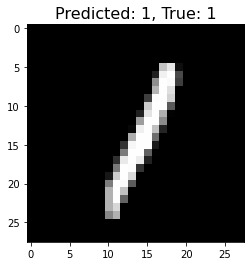

In [45]:
# Example Image

random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28, 28), cmap = 'gray')
